In [1]:
fsync_data_first_trial = {
    0: [175, 147, 153, 150, 150, 148, 147, 149, 154, 149],
    -1: [634, 695, 658, 674, 692, 664, 664, 653, 678, 656],
    104857600: [744, 777, 825, 806, 766, 814, 802, 711, 715, 796],
    10485760: [1295, 1229, 1189, 1156, 1132, 1148, 1141, 1229, 1165, 1145],
    1048576: [3091, 3110, 3108, 3110, 3089, 3114, 3124, 3127, 3134, 3105],
    524288: [5897, 5775, 5837, 5809, 5788, 5793, 5801, 5828, 5910, 5878],
    131072: [17492, 17562, 17403, 17430, 17445, 17378, 17410, 17798, 18216, 17500],
    65536: [26703, 25935, 26852, 26404, 25983, 26157, 26489, 26644, 26131, 25971],
    32768: [53491, 52538, 50030, 50220, 50005, 49866, 49774, 49419, 49357, 49319],
    16384: [101261, 103917, 103845, 104122, 103091, 105939, 104020, 103854, 104087, 104103],
}

In [2]:
fsync_data = {
  0: [160, 152, 151, 151, 151, 151, 151, 151, 151, 151, 151, 150, 151, 151, 151, 153, 153, 152, 152, 153],
  -1: [632, 648, 678, 663, 683, 660, 660, 686, 660, 669, 678, 661, 693, 660, 672, 653, 674, 665, 660, 664],
  104857600: [719, 740, 739, 736, 743, 737, 770, 736, 749, 732, 727, 735, 727, 731, 738, 762, 749, 759, 741, 743],
  10485760: [1131, 1125, 1127, 1127, 1132, 1118, 1145, 1115, 1115, 1114, 1136, 1133, 1139, 1118, 1119, 1131, 1133, 1132, 1109, 1122],
  1048576: [3140, 3171, 3173, 3125, 3153, 3154, 3152, 3193, 3126, 3190, 3155, 3163, 3197, 3162, 3170, 3178, 3123, 3176, 3157, 3136],
  524288: [5998, 5890, 5892, 5957, 5980, 5992, 6014, 5985, 5959, 5894, 5948, 5995, 5892, 5953, 5959, 5949, 5937, 5943, 5938, 5978],
  262144: [10898, 10703, 10743, 10694, 10706, 10697, 10684, 10682, 10696, 10750, 10671, 10699, 10622, 10609, 10725, 10662, 10695, 10654, 10650, 10816],
  131072: [17413, 17635, 17488, 17943, 17851, 17847, 17820, 17838, 17868, 17897, 17936, 17667, 17817, 17855, 17987, 17668, 17819, 17847, 18030, 17740],
  65536: [26767, 26643, 26811, 26972, 26739, 26783, 26852, 26996, 26956, 26998, 27085, 26872, 26767, 26743, 26953, 27047, 26988, 26972, 26778, 26969],
  32768: [54994, 53198, 52228, 52164, 52581, 52027, 52584, 52347, 51994, 52121, 51922, 52192, 52627, 52265, 52137, 52463, 52190, 52734, 52823, 52530],

  16384: [107463, 112095, 111869, 111114, 112511, 111984, 112373, 112409, 111575, 111978, 112228, 112479, 111888, 112323, 112331, 112275, 111966, 111005, 110973, 108589],
}

In [3]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.style as style

def color_bplot(bp, edge_color, fill_color):
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for box in bp['boxes']:
        box.set_facecolor(fill_color)
        
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('$\mathtt{fdatasync}$ Strategy')
        
flier = dict(markerfacecolor='r', marker='.')

def size(inp):
    mib = 1024 * 1024
    kib = 1024
    if (inp // mib > 0):
        return f"{inp // mib}MiB"
    if (inp // kib > 0):
        return f"{inp // kib}KiB"
    return f"{inp}B"


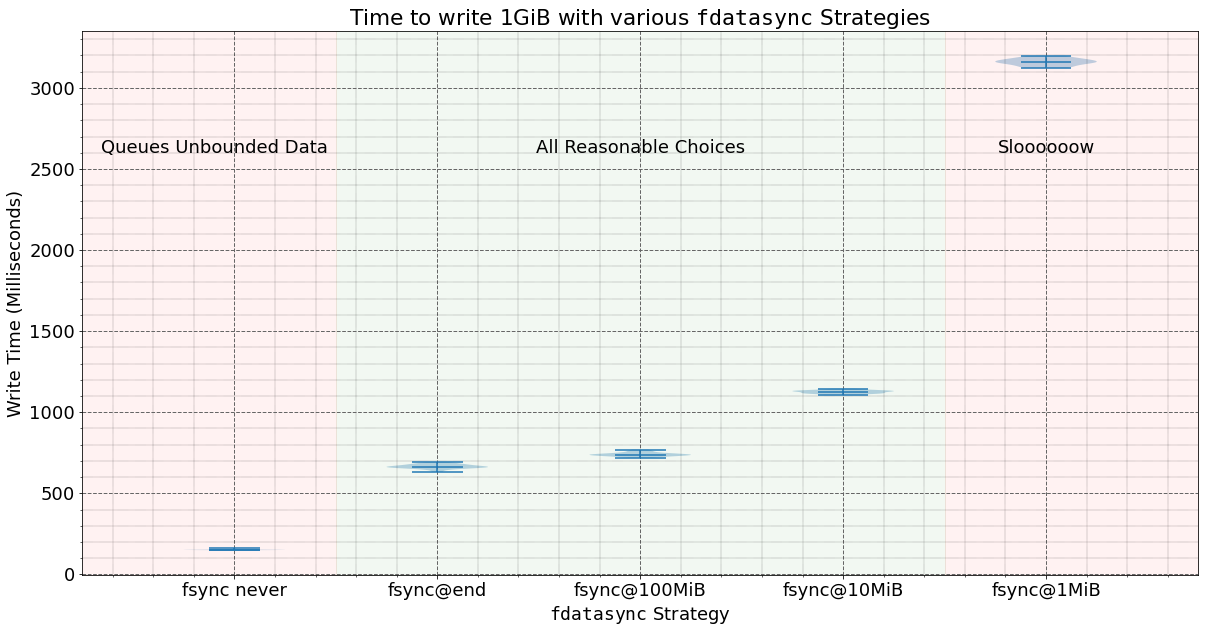

In [4]:
plt.rcParams.update({
    "font.size": 18,
})
fig1, ax = plt.subplots(figsize=(20,10))

data = {
    'fsync never': fsync_data[0],
    'fsync@end': fsync_data[-1],
}
for (k, v) in fsync_data.items():
    if k > 524288:
        data[f"fsync@{size(k)}"] = v
        
keys = sorted(data.keys(), key=lambda k: sum(data[k]))
values = [data[i] for i in keys]

#bplot1 = ax.boxplot(values, whis=[10,90], showfliers=False, flierprops=flier, labels=keys,
#                    patch_artist=True, vert=True)
#color_bplot(bplot1, 'black', 'lightblue')
vplot = ax.violinplot(values, showmeans=False, showmedians=True, vert=True)

plt.title("Time to write 1GiB with various $\mathtt{fdatasync}$ Strategies")
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth='1', color="0.4")
plt.grid(which='minor', linestyle=':', linewidth='0.4', color='black')
set_axis_style(ax, keys)
plt.ylabel('Write Time (Milliseconds)')

ylim = ax.get_ylim()
ax.fill_between(  [0,1.5], [ylim[0]] * 2, [ylim[1]] * 2, color='red',  alpha=0.05)
ax.fill_between([1.5,4.5], [ylim[0]] * 2, [ylim[1]] * 2, color='green',alpha=0.05)
ax.fill_between([4.5,6.5], [ylim[0]] * 2, [ylim[1]] * 2, color='red',  alpha=0.05)
ax.set_ylim(ylim)

ax.annotate('Queues Unbounded Data', xy=(0.9, 2600), xycoords='data', ha='center')
ax.annotate('All Reasonable Choices',xy=(3.0, 2600),   xycoords='data', ha='center')
ax.annotate('Sloooooow',             xy=(5.0, 2600),   xycoords='data', ha='center')

plt.savefig("fsync_qualitative.svg")
plt.show()

100MiB = 10.0 -> 738.5
10MiB = 100.0 -> 1127.0
1MiB = 1000.0 -> 3159.5
512KiB = 2000.0 -> 5955.0
256KiB = 4000.0 -> 10695.5
128KiB = 8000.0 -> 17842.5
64KiB = 16000.0 -> 26912.5
32KiB = 32000.0 -> 52306.0
16KiB = 64000.0 -> 111981.0
[0, 1, 3.321928094887362, 6.643856189774724, 9.965784284662087, 10.965784284662087, 11.965784284662087, 12.965784284662087, 13.965784284662087, 14.965784284662087, 15.965784284662087]


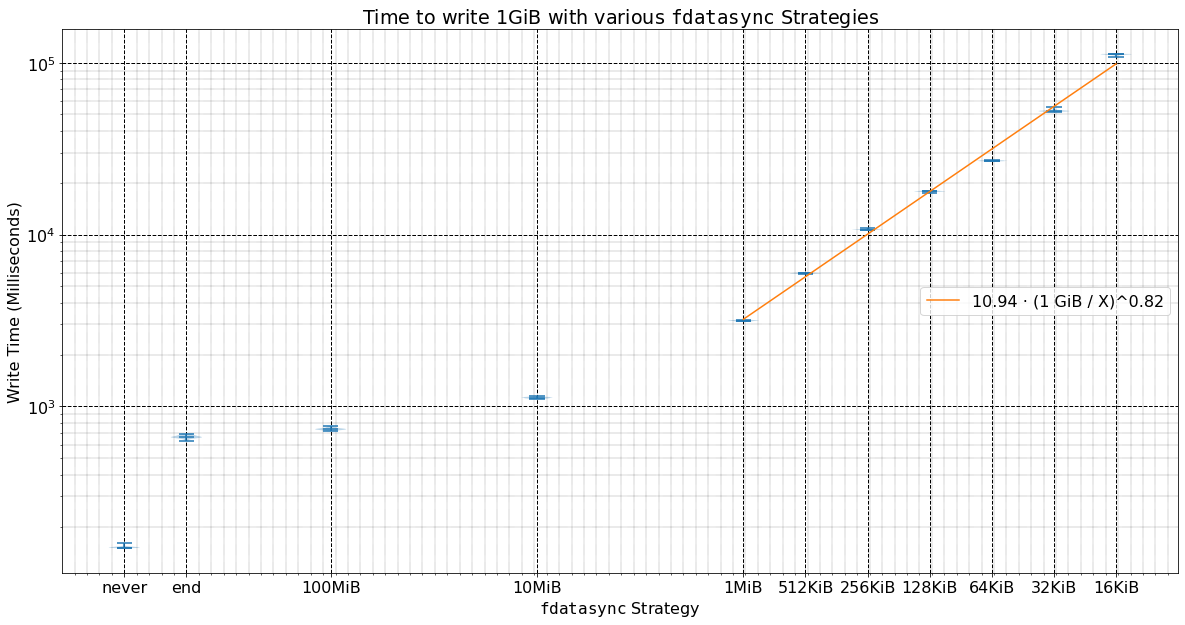

In [5]:
plt.rcParams.update({
    "font.size": 16,
})
fig1, ax = plt.subplots(figsize=(20,10))

data = {
    'never': fsync_data[0],
    'end': fsync_data[-1],
}

total = 1048576000
positions = []
for (k, v) in fsync_data.items():
    positions.append(np.log2(total/k) if k > 0 else np.abs(k))
    if k > 0:
        data[f"{size(k)}"] = v
        print(f"{size(k)} = {total/k} -> {np.median(v)}")
print(positions)

means = []
for (k, v) in data.items():
    if (k not in ("never", "end")):
        means.append(np.mean(v))
        
keys = sorted(data.keys(), key=lambda k: sum(data[k]))
values = [data[i] for i in keys]

vplot = ax.violinplot(values, showmeans=False, showmedians=True, positions=positions, vert=True)

plt.title("Time to write 1GiB with various $\mathtt{fdatasync}$ Strategies")
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth='1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color='black')
ax.set_xticks(positions, labels=keys)
ax.set_xlim(-1, max(positions) + 1)
ax.set_xlabel('$\mathtt{fdatasync}$ Strategy')
ax.set_yscale('log')
ax.set_ylabel('Write Time (Milliseconds)')


X = np.array(positions[4:])
Y = np.log2(np.array(means[2:]))
a, b = np.polyfit(X, Y, 1)
b2 = np.exp2(b)
plt.plot(X, np.exp2(a* X + b), label="{:1.2f} · (1 GiB / X)^{:1.2f}".format(b2, a))
plt.legend(loc="center right")
plt.savefig("fsync_quantitative.svg")
plt.show()